In [ ]:
%pylab inline
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.knn import KNN

In [3]:
# load data and labels

with open('/raid/mpsych/datasetASTAR.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetASTAR_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [5]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.07, .1),
    'n_neighbors': hp.uniformint('n_neighbors', 1, 50),
    'method': hp.choice('method', ['largest', 'mean', 'median']),
    'radius': hp.quniform('radius', 0.0, 5.0, .1),
    'leaf_size': hp.uniformint('leaf_size', 1, 100),
    'metric': hp.choice('metric', ['minkowski', 'cityblock', 'euclidean', 'l1', 'l2', 'manhattan', 
                                  ]),
    'p': hp.uniformint('p', 1, 10),
    'n_jobs': hp.uniformint('n_jobs', 1, 4)
}

In [ ]:
hyperOpt = O.HyperTuner(
    algorithm=KNN,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=50
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:22<00:00,  2.86s/trial, best loss: -0.8712500000000001]
Best parameters:
contamination: 0.07236974600054445
leaf_size: 83.0
method: 2.0
metric: 3.0
n_jobs: 2.0
n_neighbors: 44.0
p: 6.0
radius: 2.0


{'contamination': 0.07236974600054445,
 'leaf_size': 83.0,
 'method': 2,
 'metric': 3,
 'n_jobs': 2.0,
 'n_neighbors': 44.0,
 'p': 6.0,
 'radius': 2.0}

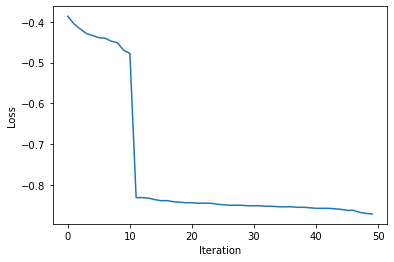

In [7]:
hyperOpt.optimize()

In [35]:
hyperOpt.display_best_params()

Best parameters:
contamination: 0.07236974600054445
leaf_size: 83.0
method: median
metric: l1
n_jobs: 2.0
n_neighbors: 44.0
p: 6.0
radius: 2.0


In [36]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.07', '0.1']
n_neighbors: ['1', '50', '1.0']
method: ['largest', 'mean', 'median']
radius: ['0.0', '5.0', '0.1']
leaf_size: ['1', '100', '1.0']
metric: ['minkowski', 'cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
p: ['1', '10', '1.0']
n_jobs: ['1', '4', '1.0']


In [35]:
print(type(hyperOpt.param_space))

<class 'dict'>


In [22]:
print(hyperOpt)

{'contamination': ['0.07', '0.1'], 'n_neighbors': ['1', '50', '1.0'], 'method': ['largest', 'mean', 'median'], 'radius': ['0.0', '5.0', '0.1'], 'leaf_size': ['1', '100', '1.0'], 'metric': ['minkowski', 'cityblock', 'euclidean', 'l1', 'l2', 'manhattan'], 'p': ['1', '10', '1.0'], 'n_jobs': ['1', '4', '1.0']}
